# King County House Price Prediction

Data Understanding

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

### Imports

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Quick EDA

Loading the king county house dataset into pandas dataframe and check the first 5 data of each feature

In [60]:
df = pd.read_csv('kc_house_data.csv')
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


Checking Datatypes

In [61]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Check duplicate data

In [62]:
df.duplicated().sum()

0

### Data Wrangling

Drop the id column because it is irrelevant to the target feature

In [63]:
df = df.drop(['id'], axis=1)
df.head().T

,0,1,2,3,4
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,3,5,3


Casting data types on date features to datetime data types and extracting years, months, and days.

In [64]:
df['date'] = pd.to_datetime(df['date'])
datedt = df['date'].dt
df['yearsold'] = datedt.year 
df['monthsold'] = datedt.month
df['daysold'] = datedt.day 
df.head().T


,0,1,2,3,4
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,3,5,3


In [65]:
df = df.drop(columns='date')

Create a plot to see the distribution of price features

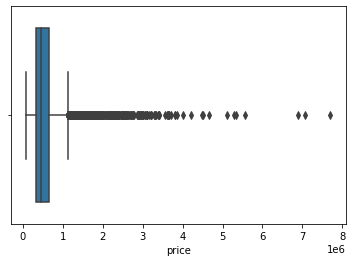

In [66]:
sns.boxplot(df['price'])
plt.show()

Checking the correlation between features using the spearman method because the target is not normally distributed

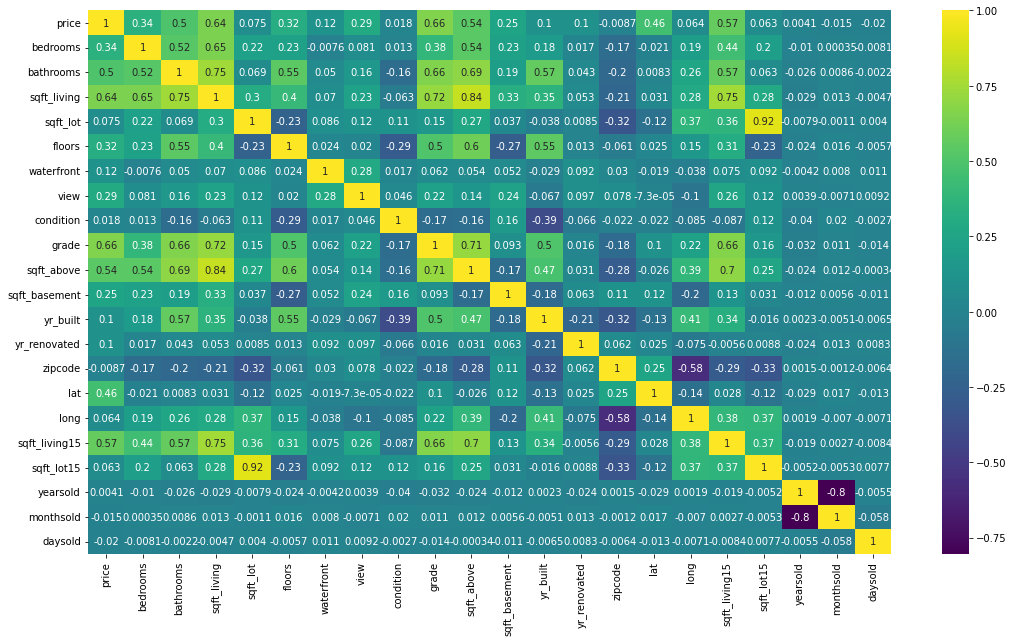

In [67]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr('spearman'), annot=True, cmap='viridis')
plt.show()

### Machine Learning Modeling

Splitting Dataset

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [69]:
X = df.drop(columns='price')
y = df['price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .20, random_state= 42)

Evaluation Matrix

In [71]:
def Eva_Matrix_Base_Class(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_train = Model.predict(X_train)
    r2_tr = r2_score(y_train, y_pred_train)
    mae_tr = mean_absolute_error(y_train, y_pred_train)
    mse_tr = mean_squared_error(y_train, y_pred_train)
    rmse_tr = np.sqrt(mse_tr)
    y_pred_test = Model.predict(X_test)
    r2_ts = r2_score(y_test, y_pred_test)
    mae_ts = mean_absolute_error(y_test, y_pred_test)
    mse_ts = mean_squared_error(y_test, y_pred_test)
    rmse_ts = np.sqrt(mse_ts)
    data = {
    Nama + " Training" : [round(r2_tr,2), round(mae_tr,2), round(mse_tr,2), round(rmse_tr,2)],
    Nama + " Testing"  : [round(r2_ts,2), round(mae_ts,2), round(mse_ts,2), round(rmse_ts,2)],
}

    df_eva = pd.DataFrame(data, index=["R2_Score", "MAE", "MSE", "RMSE"])
    return df_eva

In [72]:
df_base_linReg = Eva_Matrix_Base_Class(LinearRegression(), X_train, X_test, y_train, y_test,"Linear Regression")

In [73]:
df_base_linReg.T

,R2_Score,MAE,MSE,RMSE
Linear Regression Training,0.7,124709.25,3.909730e+10,197730.37
Linear Regression Testing,0.7,126929.17,4.495149e+10,212017.67


The result of the matrix evalution of the base model is still underifitting, we will try to improve the model.

### Feature Engineering

Transforming features into polynomial features

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
Poly = PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)

In [76]:
Poly = Poly.fit(X_train)

In [77]:
X_trainPoly = Poly.transform(X_train)
X_testPoly = Poly.transform(X_test)

In [78]:
df_XtrainPoly = pd.DataFrame(X_trainPoly)
df_XtestPoly = pd.DataFrame(X_testPoly)

In [79]:
df_linReg_PF = Eva_Matrix_Base_Class(LinearRegression(), df_XtrainPoly, df_XtestPoly, y_train, y_test,"Linear Regression + PF")

In [80]:
pd.concat([df_base_linReg, df_linReg_PF], axis=1).T

,R2_Score,MAE,MSE,RMSE
Linear Regression Training,0.70,124709.25,3.909730e+10,197730.37
Linear Regression Testing,0.70,126929.17,4.495149e+10,212017.67
Linear Regression + PF Training,0.82,99036.02,2.295487e+10,151508.66
Linear Regression + PF Testing,0.79,107835.10,3.226310e+10,179619.32


Modeling using polynomial features gives better results from the results of the evaluation matrix.

### Regularization

Trying to improve modeling using regularization

In [81]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Create function for alpha tuning 

In [82]:
def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []

    for i in Alpha:
        model_R = Model(alpha=i)
        model_R.fit(X_train, y_train)
        y_pred_tr = model_R.predict(X_train)
        R2_train = r2_score(y_train,y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)

    return train_r, test_r

In [83]:
Alpha = np.arange(0,5,0.1)

In [84]:
ridge_tr, ridge_ts = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, Ridge)

In [85]:
lasso_tr, lasso_ts = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, Lasso)

In [86]:
elasticNet_tr, elasticNet_ts = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, ElasticNet)

In [87]:
df_ridge_PF = Eva_Matrix_Base_Class(Ridge(Alpha[np.argmax(ridge_ts)]), df_XtrainPoly, df_XtestPoly, y_train, y_test,"Ridge + PF")

In [88]:
df_lasso_PF = Eva_Matrix_Base_Class(Lasso(Alpha[np.argmax(lasso_ts)]), df_XtrainPoly, df_XtestPoly, y_train, y_test,"Lasso + PF")

In [89]:
df_Enet_PF = Eva_Matrix_Base_Class(ElasticNet(Alpha[np.argmax(elasticNet_ts)]), df_XtrainPoly, df_XtestPoly, y_train, y_test,"ElsticNet + PF")

In [90]:
pd.concat([df_base_linReg, df_linReg_PF,df_ridge_PF,df_lasso_PF,df_Enet_PF], axis=1).T

,R2_Score,MAE,MSE,RMSE
Linear Regression Training,0.70,124709.25,3.909730e+10,197730.37
Linear Regression Testing,0.70,126929.17,4.495149e+10,212017.67
Linear Regression + PF Training,0.82,99036.02,2.295487e+10,151508.66
Linear Regression + PF Testing,0.79,107835.10,3.226310e+10,179619.32
Ridge + PF Training,0.82,99199.09,2.315731e+10,152175.26
Ridge + PF Testing,0.79,107619.47,3.221614e+10,179488.54
Lasso + PF Training,0.79,108074.73,2.735876e+10,165404.83
Lasso + PF Testing,0.75,113979.50,3.766923e+10,194085.63
ElsticNet + PF Training,0.79,108464.42,2.763013e+10,166223.12
ElsticNet + PF Testing,0.75,114268.02,3.762179e+10,193963.37


Conclusion :

The best modeling in King County house prediction is to use Ridge regularization and polynomial features by performing alpha tuning from the evaluation matrix results.